In [1]:
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import descartes
import sys
import sklearn
import math
from datetime import datetime as dt
sys.path.append('C:\\Users\\jades\\1001 Intro to Data Science Notebooks\\Project\\wildfires-1001\\code\\functions')
from gis_processing import *

In [2]:
gitdir = 'C:/Users/jades/1001 Intro to Data Science Notebooks/Project/wildfires-1001/'

In [3]:
subdir_from = 'data/clean_data/county_grid/'
filename_from = 'county_grid.shp'

county_grid_map = gpd.read_file(gitdir + subdir_from + filename_from)

In [ ]:
subdir_from = 'data/clean_data/NOAA-station-lists/'
#filename_from = 'station_list_v2.csv'
filename_from = 'station_list_v2_old.csv'

noaa_gpd = gpd.read_file(gitdir + subdir_from + filename_from)

In [15]:
noaa_gpd

,ID,LATITUDE,LONGITUDE,geometry
0,USC00040029,41.1936,-120.9447,None
1,USC00040136,32.8358,-116.7775,None
2,USC00040144,34.1822,-118.1383,None
3,USC00040176,34.5592,-115.7442,None
4,USC00040192,33.8647,-117.8425,None
5,USC00040212,38.5731,-122.4406,None
6,USC00040232,37.9833,-121.7525,None
7,USC00040343,36.4914,-118.8253,None
8,USC00040383,38.9072,-121.0839,None
9,USC00040449,36.9092,-119.0883,None


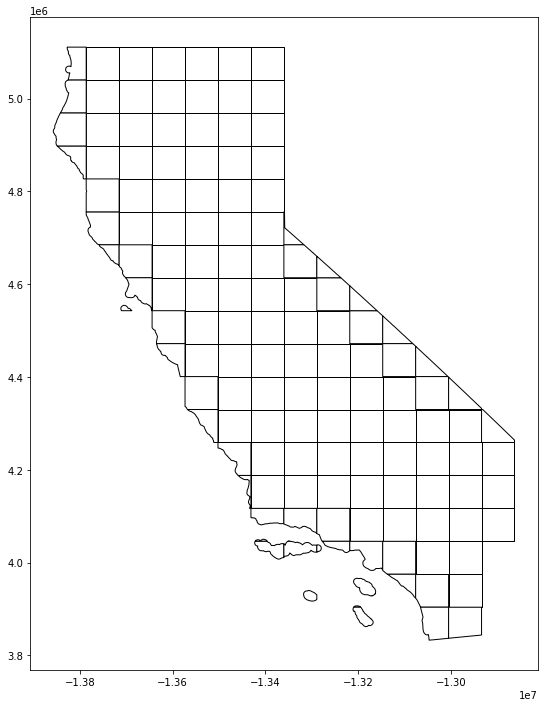

In [10]:
county_grid_map.plot(color = 'white', edgecolor = 'black', figsize = (12, 12))

In [ ]:
#Calculate the centroids of the grids and the stations
county_grid_final['x1'] = county_grid_final.centroid.x
county_grid_final['y1'] = county_grid_final.centroid.y

noaa_gdf['x2'] = noaa_gdf.centroid.x
noaa_gdf['y2'] = noaa_gdf.centroid.y

In [ ]:
#Create a dummy key to enable us to cross join, do the join, the drop the key
county_grid_final['key'] = 1
noaa_gdf['key'] = 1

distance_calc = county_grid_final[['GRID_ID', 'geometry', 'x1', 'y1', 'key']].merge(noaa_gdf[['ID', 'geometry', 'x2', 'y2', 'key']], how='inner', left_on='key', right_on='key')

county_grid_final = county_grid_final.drop(['key'], axis=1)
noaa_gdf = noaa_gdf.drop(['key'], axis=1)

In [ ]:
#Calculate the distance between each grid centroid and station
#Map each grid to its nearest station
distance_calc['distance'] = ((distance_calc['x1']-distance_calc['x2'])**2 + (distance_calc['y1']-distance_calc['y2'])**2)**(1/2)

station_grid_map = distance_calc.loc[test.groupby('GRID_ID').distance.idxmin()].reset_index(drop=True)[['GRID_ID', 'ID']]

In [ ]:
#Save the cleaned dataframe
subdir_to = 'data/clean_data/mapping_tables/'
filename_to = 'station_grid_map.csv'
station_grid_map.to_csv(gitdir + subdir_to + filename_to, index=False)